# 各channel平均spike波形

session: 1
Dataset : /home/jovyan/dataset/indy/Sorted_Spike_Dataset/indy_20160407_02.mat
<HDF5 dataset "wf": shape (3, 192), type "|O">
<HDF5 dataset "spikes": shape (3, 192), type "|O">


/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeW

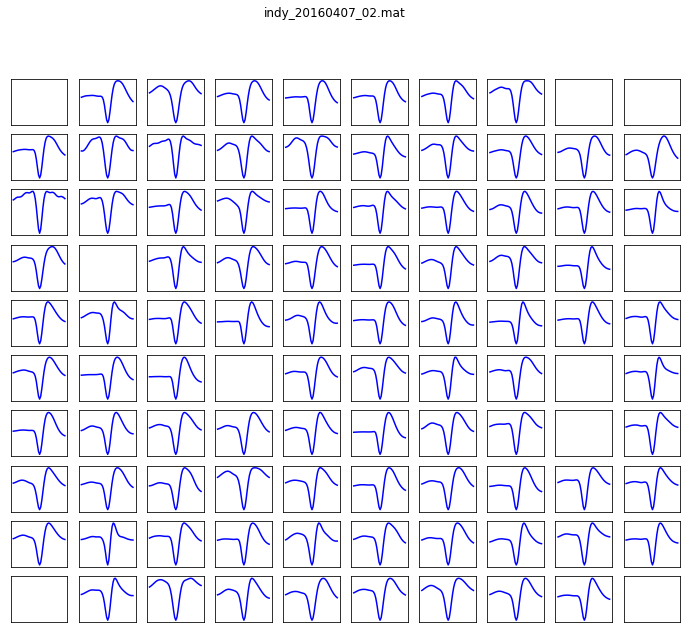

In [10]:
"""
Created on Mon Oct  5 14:00:53 2020

@author: ogk
"""

import h5py
import matplotlib.pyplot as plt
import numpy as np 
import os
from os import listdir
import seaborn as sns

dataset_path = '/home/jovyan/dataset/indy/Sorted_Spike_Dataset/'

if os.path.isdir(dataset_path) != True:
    print('\n>> Not find dataset folder path: '+dataset_path)
    print('>> Please Check folder_path && Computer working system !\n')

session = []
for i in range(37):
    session.append(i+1)
    
List_File = listdir(dataset_path)
List_File.sort()
session_avg = []
Channel_List = []
channel_arr = []
channel_arr.append(['N', 42, 46, 25, 31, 35, 39, 41, 47, 'N'])
channel_arr.append([ 38, 40, 48, 27, 29, 33, 37, 43,  6, 45])
channel_arr.append([ 34, 36, 44,  1,  9, 13, 17, 21,  2, 88])
channel_arr.append([ 30, 32, 89, 93,  5, 15, 19, 23,  8, 84])
channel_arr.append([ 26, 28, 81, 85, 87, 91,  7,  4, 86, 80])
channel_arr.append([ 22, 24, 77, 79, 83,  3, 11, 66, 82, 76])
channel_arr.append([ 18, 20, 73, 75, 95, 54, 62, 74, 78, 72])
channel_arr.append([ 14, 16, 94, 96, 57, 58, 50, 70, 64, 68])
channel_arr.append([ 10, 12, 90, 92, 61, 65, 69, 71, 56, 60])
channel_arr.append(['N', 51, 49, 53, 55, 59, 63, 67, 52,'N' ])
for i in range(10):
    for j in range(10):
        Channel_List.append(channel_arr[i][j])
channel = Channel_List

#選session
select_session = 0 
print('session: '+str(select_session+1))
bin_width = 16
file_name = List_File[select_session]
print('Dataset :',dataset_path+str(file_name))
mat_file = h5py.File(dataset_path+str(file_name), 'r') # read mat file
CHANNELS = mat_file[list(mat_file.keys())[1]] # electric channel Info
CURSOR_POS = mat_file[list(mat_file.keys())[2]] # cursor position
FINGER_POS = mat_file[list(mat_file.keys())[3]] # finger position
SPIKES = mat_file[list(mat_file.keys())[4]] # Spike firing time point 這邊是紀錄發生spike的時間點,所以根據bins寬度,要另外整理
Session_Unit = SPIKES.shape[0] # session unit count ,此一session有幾個被sorting的unit 第一筆皆為hash
TIMES = mat_file[list(mat_file.keys())[5]] # session t 0.004=4ms
time_bin = (TIMES[0])[::bin_width]
WF = mat_file[list(mat_file.keys())[7]]
print(WF)
print(SPIKES)

# # get wave form
search_index = 0
mean_list = []
fig, ax = plt.subplots(figsize=(12,10))
fig.suptitle(str(file_name))  
for ch_index in channel:
    '''
    If use channel count 100 , the channel list has 'N'
    ch_index-1 : because setting channel number start is 1 ,but program is start 0
    '''
    # concat data by channel
    wf = np.empty([48, 0])  # 注意有些session的spike waveform長度是64，不是48(session_6還8之後吧!?)
    # print('===ch :',ch_index)
    plt.subplot(10, 10, search_index+1)
    plt.xticks([])
    plt.yticks([])
    if str(ch_index) != 'N':
        spike_index = 0
        for u in range(Session_Unit):
            # print(u)
            unit_wf = mat_file[WF[u][ch_index-1]] 
            if np.array(unit_wf).shape[0] != 2:
                wf = np.concatenate((np.array(wf), np.array(unit_wf)), axis=1)
        wf_mean = np.mean(wf, axis=1)

        # print(' unit num :',u)
        # print('>>>', np.array(wf).shape)
        wf_len = np.arange(np.array(wf).shape[0])
        if np.array(wf).shape[0] !=0 :
            plt.plot(wf_len, wf_mean, 'blue')
    search_index +=1  
fig = plt.gcf()